This notebook contains code for checking, based on the stances and disease classification as *common cold* vs. other, if there is any gender bias in doctor's response for queries about common cold.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import glob
import pandas as pd

# Get list of all csv files in folder
path = "/content/drive/MyDrive/Stance-n-Disease/*.csv"
csv_files = glob.glob(path)

# Create empty dataframe
df = pd.DataFrame()

# Loop through csv files and read them in
for f in csv_files:
    data = pd.read_csv(f)

    # Append csv data to dataframe
    df = df.append(data)

# Reset index
df = df.reset_index(drop=True)

print(df)

<ipython-input-3-fa6fd9fe16d1>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
<ipython-input-3-fa6fd9fe16d1>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
<ipython-input-3-fa6fd9fe16d1>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
<ipython-input-3-fa6fd9fe16d1>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
<ipython-input-3-fa6fd9fe16d1>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data)
<ipython-input-3-fa6fd9fe16d1>:16: FutureWarn

        Unnamed: 0.1  Unnamed: 0     id  \
0                  0           0      0   
1                  1           1      1   
2                  2           2      2   
3                  3           3      3   
4                  4           4      4   
...              ...         ...    ...   
257464          9995       79995  79995   
257465          9996       79996  79996   
257466          9997       79997  79997   
257467          9998       79998  79998   
257468          9999       79999  79999   

                                              Description  \
0           Q. What does abutment of the nerve root mean?   
1       Q. Every time I eat spicy food, I poop blood. ...   
2       Q. Will Nano-Leo give permanent solution for e...   
3       Q. Will Kalarchikai cure multiple ovarian cyst...   
4       Q. I masturbate only by rubbing the tip of the...   
...                                                   ...   
257464              What causes offensive odour in urine


Subset the dataframe to include only the queries that are (most likely) about common cold (the frequency of common cold words and phrases >= 2)

In [8]:
df_common_cold = df[df['Common_cold_freq_pat'] >= 2]

In [9]:
df_common_cold['Common_cold_freq_pat'].describe()

count    15822.000000
mean         2.908545
std          1.414631
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         24.000000
Name: Common_cold_freq_pat, dtype: float64

In [12]:
df_common_cold.shape

(15822, 15)

In [10]:
df_common_cold.groupby('Gender')['entailment', 'neutral', 'contradiction'].mean()

<ipython-input-10-4d1188c5c049>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_common_cold.groupby('Gender')['entailment', 'neutral', 'contradiction'].mean()


,entailment,neutral,contradiction
Gender,,,
F,28.949217,69.010120,2.029408
M,27.581104,69.711664,2.696864
X,31.483525,66.918380,1.586489


<ipython-input-13-d6769f30f9ac>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_common_cold.groupby('Gender')['entailment', 'neutral', 'contradiction'].mean().plot(kind='barh')


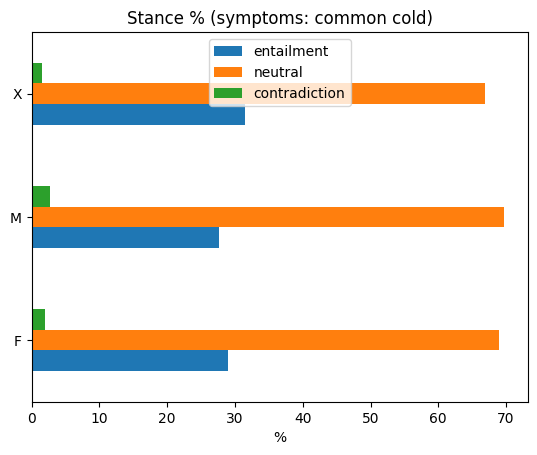

In [13]:
df_common_cold.groupby('Gender')['entailment', 'neutral', 'contradiction'].mean().plot(kind='barh')

# Add labels
plt.xlabel('%')
plt.ylabel('')
plt.title('Stance % (symptoms: common cold)')

# plt.legend(handles, labels, loc='center right')
plt.legend(loc='upper center')

plt.show()